# Notes

NOTES [27/7/24]
1. data leakage (kebocoran data): the mixed information of target/test on train data but similar data will not be available when the model is used for prediction (always splitting first then preposs)
   https://www.kaggle.com/code/alexisbcook/data-leakage [DONE]
   a. target leakage: occurs when your predictors include data that will not be available at the time you make predictions.
   b. train_test contamination: good validation scores model but poor on making decisions

2. "split the data X and y first then preprocess the data" [DONE]
3. skipped steps
   a. encode all categorical columns except Nama Resolver [DONE]
   b. correlation must on every columns but first encode the categorical datas [DONE]
   c. feature selections based on the corr [DONE]
4. outliers 
   a. di bawah 20% = droppable, above 20%= missing value removal
   b. trial and error for outlier using mean, interquartile, etc [DONE] using IQR
5. data correlations
   a. spearman
   b. pearson [DONE]
   c. the larger number r the strongest, the more clos to zero then the lowest
6. feature selection
   a. use the correlation and find the feature relations [DONE]
7. accuracy improvement/ modelling scope
   https://www.geeksforgeeks.org/hyperparameter-tuning/
   a. optuna 
   b. randomiser
   c. gridsearchcv
8. try more than 1 model on same library
9. PCA= usually for big data
10. Data Science study: https://apps.cognitiveclass.ai/authn/login?next=https%3A%2F%2Fapps.cognitiveclass.ai%2Flearning%2Fcourse%2Fcourse-v1%3ACognitiveClass%2BDS0103EN%2Bv3%2Fblock-v1%3ACognitiveClass%2BDS0103EN%2Bv3%2Btype%40sequential%2Bblock%40aed4761a25e64d57af95da56a15ac609%2Fblock-v1%3ACognitiveClass%2BDS0103EN%2Bv3%2Btype%40vertical%2Bblock%40a06f95c4e4df4b2db616abfa0bbdc517
   

# Data Overview

In [266]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [267]:
data= pd.read_csv(r"C:\Users\Lenovo\analyst_pkl\data\cleanedData.csv", sep=';')
data.head(5)

,ID Resolver,Nama Resolver,Grup Resolver,Durations,Total Project,Total Time,Usia,Kualifikasi,Lama Kerja,Kelas Keahlian
0,69,Febrian Hilmi Firdaus,DSO,5,10,3831,48,S2,13,Utama
1,4,Azhar Mashuri,DIP,0,51,3734,28,S1,24,Madya
2,74,Hayan .,DSO,0,6,2043,22,Lulus SMA,69,Madya
3,62,Villa Nanda,DIP,1,20,754,22,Lulus SMA,122,Muda
4,41,Ghazi Muwaffaq,DSO,52,5,7052,24,Lulus SMA,135,Utama


In [268]:
#removing unwanted signs
data['Nama Resolver'] = data['Nama Resolver'].str.replace('.', '', regex=False).str.strip()
data['Nama Resolver'] = data['Nama Resolver'].str.replace('-', '', regex=False).str.strip()
data.head(5)

,ID Resolver,Nama Resolver,Grup Resolver,Durations,Total Project,Total Time,Usia,Kualifikasi,Lama Kerja,Kelas Keahlian
0,69,Febrian Hilmi Firdaus,DSO,5,10,3831,48,S2,13,Utama
1,4,Azhar Mashuri,DIP,0,51,3734,28,S1,24,Madya
2,74,Hayan,DSO,0,6,2043,22,Lulus SMA,69,Madya
3,62,Villa Nanda,DIP,1,20,754,22,Lulus SMA,122,Muda
4,41,Ghazi Muwaffaq,DSO,52,5,7052,24,Lulus SMA,135,Utama


# Data Categorical

In [269]:
#objt(str) to category
data['Grup Resolver'] = data['Grup Resolver'].astype('category')
data['Nama Resolver'] = data['Nama Resolver'].astype('category')
data['Kualifikasi'] = data['Kualifikasi'].astype('category')
data['Kelas Keahlian'] = data['Kelas Keahlian'].astype('category')

In [270]:
#encoding with LabelEncoder
encoder= LabelEncoder()

In [271]:
#encoding columns for Data Corr
data['Kualifikasi_enc']= encoder.fit_transform(data['Kualifikasi'])
data['KelasKeahlian_enc']= encoder.fit_transform(data['Kelas Keahlian'])
data['GrupResolver_enc']= encoder.fit_transform(data['Grup Resolver'])
data['NamaResolver_enc']= encoder.fit_transform(data['Nama Resolver'])
data_corr= data.drop(['Kualifikasi', 'Kelas Keahlian', 'Grup Resolver', 'Nama Resolver'], axis=1)
data_corr.head()

,ID Resolver,Durations,Total Project,Total Time,Usia,Lama Kerja,Kualifikasi_enc,KelasKeahlian_enc,GrupResolver_enc,NamaResolver_enc
0,69,5,10,3831,48,13,2,2,6,20
1,4,0,51,3734,28,24,1,0,3,8
2,74,0,6,2043,22,69,0,0,6,23
3,62,1,20,754,22,122,0,1,3,41
4,41,52,5,7052,24,135,0,2,6,21


In [272]:
#Standardize the columns
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data_corr)
data_corr = pd.DataFrame(standardized_data, columns=data_corr.columns)

In [273]:
data_corr.head(5)

,ID Resolver,Durations,Total Project,Total Time,Usia,Lama Kerja,Kualifikasi_enc,KelasKeahlian_enc,GrupResolver_enc,NamaResolver_enc
0,0.290457,-0.355367,-0.006714,0.166211,1.325139,-1.307397,1.148391,1.252790,0.848428,-0.188311
1,-1.589341,-0.366344,3.159035,0.145610,-0.472985,-1.200472,-0.052200,-1.148391,-0.652637,-1.092203
2,0.435057,-0.366344,-0.315568,-0.213537,-1.012422,-0.763053,-1.252790,-1.148391,0.848428,0.037662
3,0.088017,-0.364149,0.765420,-0.487303,-1.012422,-0.247871,-1.252790,0.052200,-0.652637,1.393501
4,-0.519302,-0.252184,-0.392781,0.850309,-0.832610,-0.121505,-1.252790,1.252790,0.848428,-0.112987


# Data Corr [bf feature selection]

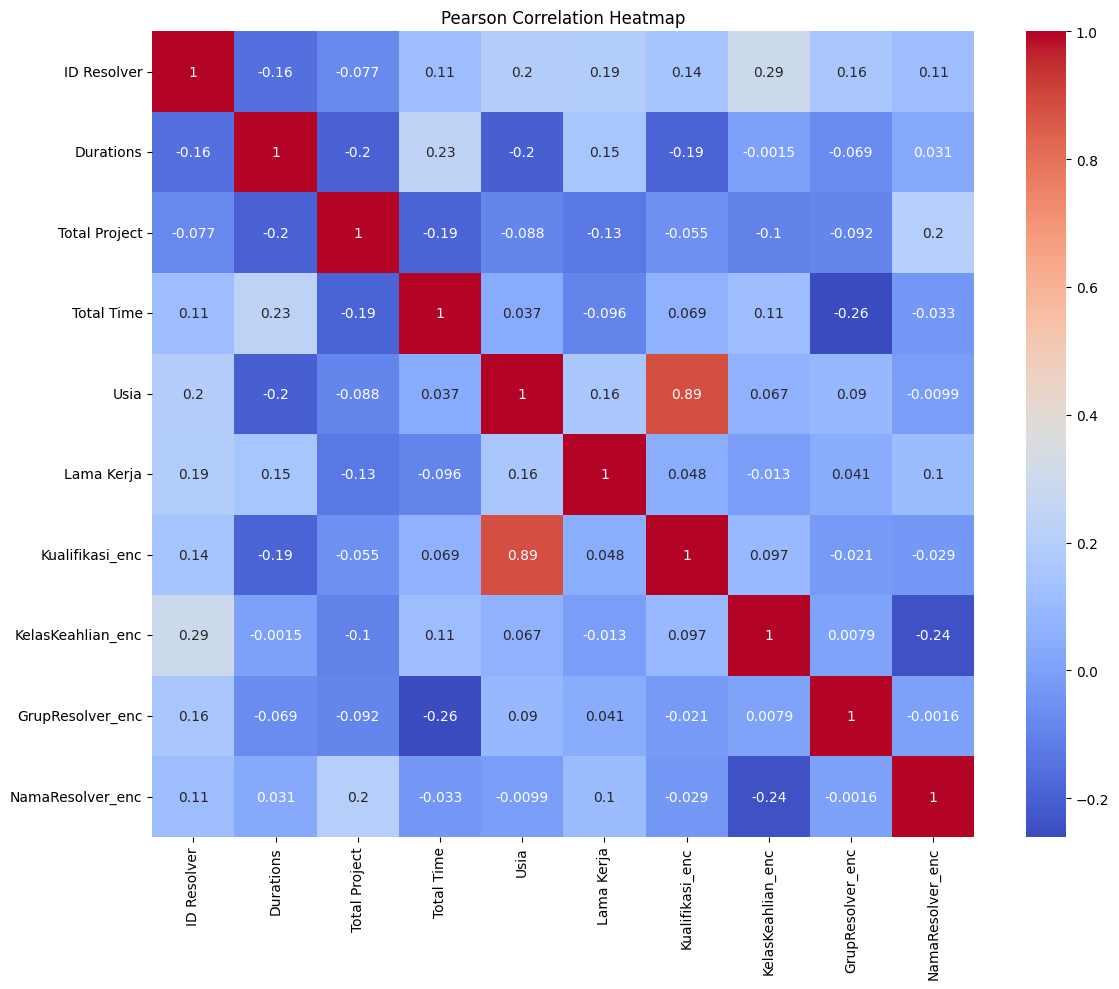

In [274]:
#data corr bf feature selection
pearson_corr = data_corr.corr(method='pearson')
plt.figure(figsize=(12, 10))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Heatmap')
plt.tight_layout()
plt.show()

# Data Feature Selection

In [275]:
data.head(5)

,ID Resolver,Nama Resolver,Grup Resolver,Durations,Total Project,Total Time,Usia,Kualifikasi,Lama Kerja,Kelas Keahlian,Kualifikasi_enc,KelasKeahlian_enc,GrupResolver_enc,NamaResolver_enc
0,69,Febrian Hilmi Firdaus,DSO,5,10,3831,48,S2,13,Utama,2,2,6,20
1,4,Azhar Mashuri,DIP,0,51,3734,28,S1,24,Madya,1,0,3,8
2,74,Hayan,DSO,0,6,2043,22,Lulus SMA,69,Madya,0,0,6,23
3,62,Villa Nanda,DIP,1,20,754,22,Lulus SMA,122,Muda,0,1,3,41
4,41,Ghazi Muwaffaq,DSO,52,5,7052,24,Lulus SMA,135,Utama,0,2,6,21


In [276]:
#value count dari kelas keahlian
data['KelasKeahlian_enc'].value_counts()

KelasKeahlian_enc
0    17
2    15
1    14
Name: count, dtype: int64

In [384]:
y_train.value_counts()

KelasKeahlian_enc
0    15
2    12
1     9
Name: count, dtype: int64

In [385]:
y_test.value_counts()

KelasKeahlian_enc
1    5
2    3
0    2
Name: count, dtype: int64

In [307]:
#feature selection
X= data.drop(['Nama Resolver', 'Grup Resolver', 'Kelas Keahlian', 'Kualifikasi', 'NamaResolver_enc', 'ID Resolver', 'Kualifikasi_enc', 'KelasKeahlian_enc'], axis=1) 
y= data['KelasKeahlian_enc']

In [308]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [309]:
X_train.head(5)

,Durations,Total Project,Total Time,Usia,Lama Kerja,GrupResolver_enc
0,5,10,3831,48,13,6
41,17,1,17,47,262,3
32,1,2,966,24,338,6
35,24,1,15030,29,116,2
21,1,17,77,37,89,3


In [310]:
#encoding with LabelEncoder
#encoder= LabelEncoder()

In [311]:
#encoding columns
#X_train['Kualifikasi_enc']= encoder.fit_transform(X_train['Kualifikasi'])
#X_train= X_train.drop(['Kualifikasi'], axis=1)
#X_train.head()

# Data Normalization & Outlier Visualization

di bawah 20% = droppable
above 20%= missing value removal, if non then u're safe
trial and error for outlier using mean, interquartile

normalizing the original data from data df

In [312]:
#standarization
#columns_to_standardize = ['Durations', 'Total Project', 'Total Time', 'Usia', 'Lama Kerja', 'Kualifikasi_enc', 'ID Resolver', 'GrupResolver_enc']
#X_train_awal= pd.DataFrame(X_train)
# Standardize the specified columns
#for column in columns_to_standardize:
#    mean = X_train[column].mean()
#    std = X_train[column].std()
#    X_train[column] = (X_train[column] - mean) / std

In [313]:
#normalization
scaler = MinMaxScaler()
X_train_normalized = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_train_normalized.head(5)

,Durations,Total Project,Total Time,Usia,Lama Kerja,GrupResolver_enc
0,0.002019,0.18,0.185033,0.722222,0.029586,0.857143
1,0.006863,0.00,0.000773,0.694444,0.766272,0.428571
2,0.000404,0.02,0.046621,0.055556,0.991124,0.857143
3,0.009689,0.00,0.726074,0.194444,0.334320,0.285714
4,0.000404,0.32,0.003672,0.416667,0.254438,0.428571


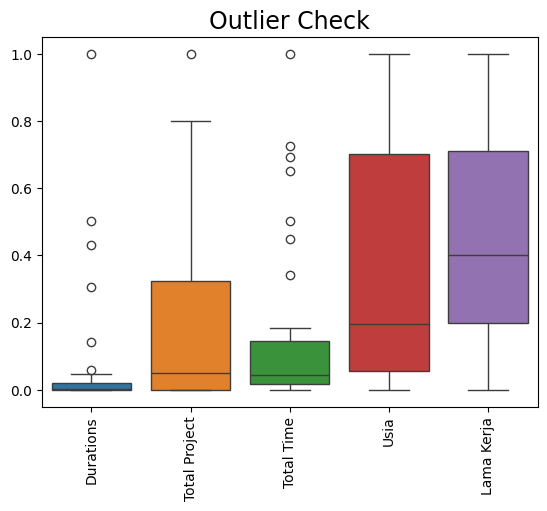

In [314]:
#identifying with Boxplot
sns.boxplot(X_train_normalized[['Durations', 'Total Project', 'Total Time', 'Usia', 'Lama Kerja']])
plt.title("Outlier Check", size = 17)
plt.xticks(rotation = 90)
plt.show()


In [315]:
X_train_normalized.head(5)

,Durations,Total Project,Total Time,Usia,Lama Kerja,GrupResolver_enc
0,0.002019,0.18,0.185033,0.722222,0.029586,0.857143
1,0.006863,0.00,0.000773,0.694444,0.766272,0.428571
2,0.000404,0.02,0.046621,0.055556,0.991124,0.857143
3,0.009689,0.00,0.726074,0.194444,0.334320,0.285714
4,0.000404,0.32,0.003672,0.416667,0.254438,0.428571


notes: trial and error for outlier using mean, interquartile, 


In [ ]:
#handling outlier with zscore
#from scipy.stats import zscore

#scaler = StandardScaler()
#X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

# Function to replace outliers with mean based on z-scores
#def replace_outliers_with_mean_zscore(X_train):
#    for column in X_train.columns:
       # Calculate z-scores
#        z_scores = zscore(X_train[column])
       # Identify outliers
#        outliers = np.abs(z_scores) > 3
        # Calculate the mean of non-outlier values
#        mean_value = X_train.loc[~outliers, column].mean()
        # Replace outliers with the mean value
#        X_train.loc[outliers, column] = mean_value
#   return X_train

#df_no_outliers = replace_outliers_with_mean_zscore(X_train)

In [ ]:
#plt.figure(figsize=(12, 8))
#sns.boxplot(data=df_no_outliers)
#plt.title('Outlier Check')
#plt.show()

# Handling Outlier

source
https://www.youtube.com/watch?v=Cw2IvmWRcXs

### 'Durations'

In [316]:
q1= X_train_normalized['Durations'].quantile(0.25)
q3= X_train_normalized['Durations'].quantile(0.75)
iqr= q3-q1
q1, q3, iqr

(0.0, 0.02008477997577715, 0.02008477997577715)

In [317]:
upper_limit= q3 + (1.5 * iqr)
lower_limit= q3 - (1.5 * iqr)
lower_limit, upper_limit

(-0.010042389987888575, 0.050211949939442876)

<Axes: ylabel='Durations'>

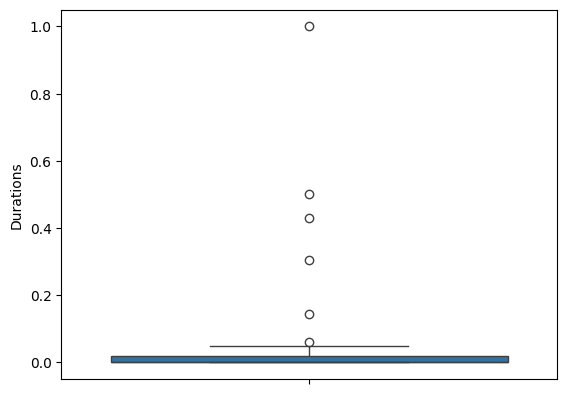

In [318]:
sns.boxplot(X_train_normalized['Durations'])

In [319]:
# find the outliers of df
X_train_normalized.loc[(X_train_normalized['Durations'] > upper_limit) | (X_train_normalized['Durations'] < lower_limit)]


,Durations,Total Project,Total Time,Usia,Lama Kerja,GrupResolver_enc
12,0.430359,0.20,0.692207,0.000000,0.559172,0.857143
14,0.502220,0.00,0.060051,0.055556,0.801775,1.000000
24,0.305612,0.02,0.134016,0.055556,0.325444,0.285714
25,0.142915,0.00,0.090053,0.250000,0.201183,1.000000
28,0.059346,0.00,0.018986,1.000000,0.855030,1.000000
32,1.000000,0.02,0.449297,0.194444,0.695266,0.285714


In [320]:
#trimming
X_train_nD= X_train_normalized.loc[(X_train_normalized['Durations'] < upper_limit) & (X_train_normalized['Durations'] > lower_limit)]
print('before removing outliers:', len(X_train_normalized))
print('after removing outliers:', len(X_train_nD))
print('outliers:', len(X_train_normalized) - len(X_train_nD))

before removing outliers: 36
after removing outliers: 30
outliers: 6


In [321]:
#capping: changing the outlier values to upper/lower limit values
X_train_nD = X_train_normalized.copy()
X_train_nD.loc[X_train_nD['Durations'] > upper_limit, 'Durations'] = upper_limit
X_train_nD.loc[X_train_nD['Durations'] < lower_limit, 'Durations'] = lower_limit

<Axes: ylabel='Durations'>

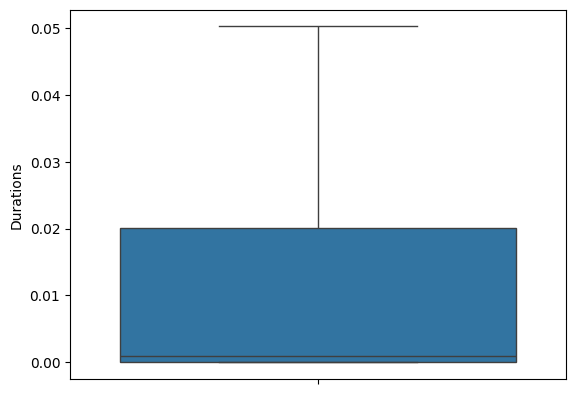

In [322]:
sns.boxplot(X_train_nD['Durations'])

### 'Total Project'

In [323]:
q1= X_train_normalized['Total Project'].quantile(0.25)
q3= X_train_normalized['Total Project'].quantile(0.75)
iqr= q3-q1
q1, q3, iqr

(0.0, 0.325, 0.325)

In [324]:
upper_limit= q3 + (1.5 * iqr)
lower_limit= q3 - (1.5 * iqr)
lower_limit, upper_limit

(-0.16250000000000003, 0.8125)

<Axes: ylabel='Total Project'>

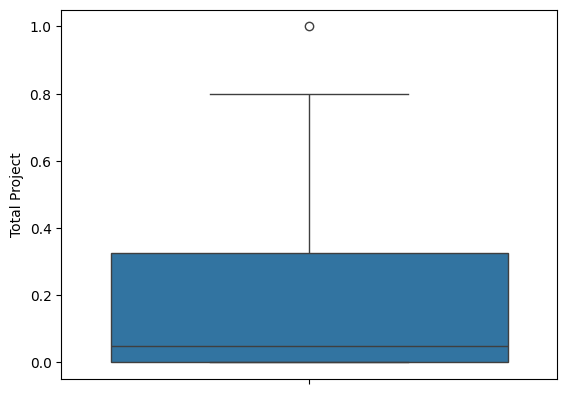

In [325]:
sns.boxplot(X_train_normalized['Total Project'])

In [326]:
# find the outliers of df
X_train_normalized.loc[(X_train_normalized['Total Project'] > upper_limit) | (X_train_normalized['Total Project'] < lower_limit)]

,Durations,Total Project,Total Time,Usia,Lama Kerja,GrupResolver_enc
11,0.0,1.0,0.180347,0.166667,0.06213,0.428571


In [327]:
#trimming
X_train_nP= X_train_normalized.loc[(X_train_normalized['Total Project'] < upper_limit) & (X_train_normalized['Total Project'] > lower_limit)]
print('before removing outliers:', len(X_train_normalized))
print('after removing outliers:', len(X_train_nP))
print('outliers:', len(X_train_normalized) - len(X_train_nP))

before removing outliers: 36
after removing outliers: 35
outliers: 1


In [328]:
#capping: changing the outlier values to upper/lower limit values
X_train_nP = X_train_normalized.copy()
X_train_nP.loc[X_train_nP['Total Project'] > upper_limit, 'Total Project'] = upper_limit
X_train_nP.loc[X_train_nP['Total Project'] < lower_limit, 'Total Project'] = lower_limit

<Axes: ylabel='Total Project'>

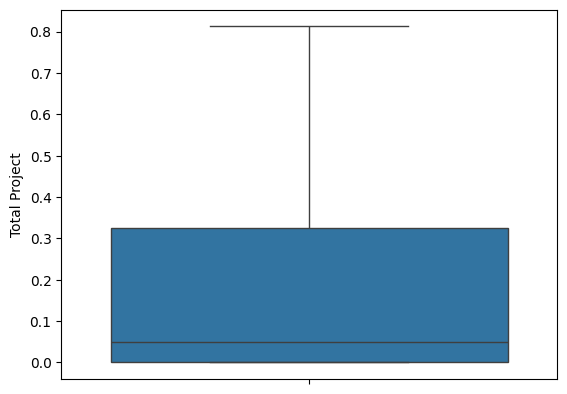

In [329]:
sns.boxplot(X_train_nP['Total Project'])

### 'Total Time'

In [330]:
q1= X_train_normalized['Total Time'].quantile(0.25)
q3= X_train_normalized['Total Time'].quantile(0.75)
iqr= q3-q1
q1, q3, iqr

(0.018273829653606452, 0.14559882119909176, 0.12732499154548532)

In [331]:
upper_limit= q3 + (1.5 * iqr)
lower_limit= q3 - (1.5 * iqr)
lower_limit, upper_limit

(-0.04538866611913622, 0.33658630851731974)

<Axes: ylabel='Total Time'>

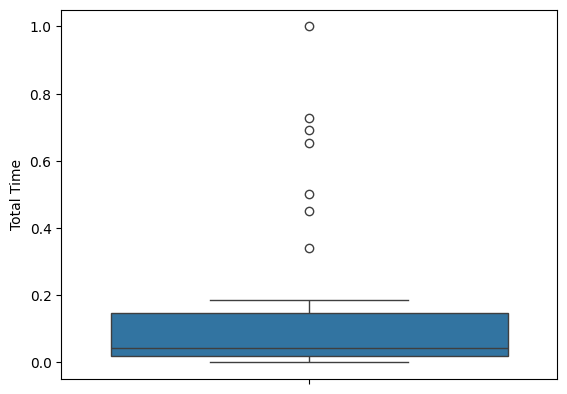

In [332]:
sns.boxplot(X_train_normalized['Total Time'])

In [333]:
# find the outliers of df
X_train_normalized.loc[(X_train_normalized['Total Time'] > upper_limit) | (X_train_normalized['Total Time'] < lower_limit)]

,Durations,Total Project,Total Time,Usia,Lama Kerja,GrupResolver_enc
3,0.009689,0.00,0.726074,0.194444,0.334320,0.285714
6,0.000404,0.00,0.651529,0.388889,0.633136,0.142857
12,0.430359,0.20,0.692207,0.000000,0.559172,0.857143
20,0.018167,0.04,1.000000,0.833333,0.414201,0.285714
21,0.020993,0.08,0.340644,0.055556,0.390533,0.857143
23,0.019782,0.00,0.500845,0.138889,0.000000,0.142857
32,1.000000,0.02,0.449297,0.194444,0.695266,0.285714


In [334]:
#trimming
X_train_nT= X_train_normalized.loc[(X_train_normalized['Total Time'] < upper_limit) & (X_train_normalized['Total Time'] > lower_limit)]
print('before removing outliers:', len(X_train_normalized))
print('after removing outliers:', len(X_train_nT))
print('outliers:', len(X_train_normalized) - len(X_train_nT))

before removing outliers: 36
after removing outliers: 29
outliers: 7


<Axes: ylabel='Total Project'>

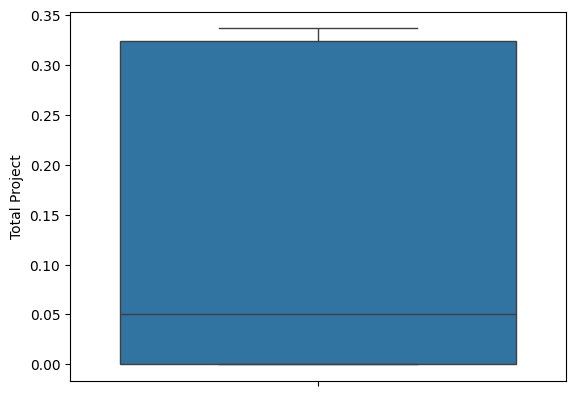

In [335]:
#capping: changing the outlier values to upper/lower limit values
X_train_nP = X_train_normalized.copy()
X_train_nP.loc[X_train_nP['Total Project'] > upper_limit, 'Total Project'] = upper_limit
X_train_nP.loc[X_train_nP['Total Project'] < lower_limit, 'Total Project'] = lower_limit

sns.boxplot(X_train_nP['Total Project'])

### Mapping

mapping the removal outliers to X_train_normalized

In [336]:
X_train = pd.concat([X_train_normalized, X_train_nD, X_train_nP, X_train_nT], axis=1)
X_train = X_train.loc[:, ~X_train.columns.duplicated()]

In [337]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Durations         36 non-null     float64
 1   Total Project     36 non-null     float64
 2   Total Time        36 non-null     float64
 3   Usia              36 non-null     float64
 4   Lama Kerja        36 non-null     float64
 5   GrupResolver_enc  36 non-null     float64
dtypes: float64(6)
memory usage: 1.8 KB


# Data Model

sources
https://builtin.com/data-science/supervised-machine-learning-classification

## KFold Cross Validation & SMOTE

Cross validation aims to increase the the overall model performance on unseen data.Able to fix the hyperparameter tuning's problem such as leakage data on test sets.

1. KFold https://www.w3schools.com/python/python_ml_cross_validation.asp
   The training data used in the model is split, into k number of smaller sets, to be used to validate the model. The model is then trained on k-1 folds of training set. The remaining fold is then used as a validation set to evaluate the model.

In [ ]:
#from sklearn.model_selection import KFold, cross_val_score
#kf = KFold(n_splits=5, shuffle=True, random_state=100)

In [ ]:
#smote = SMOTE(random_state=100)
#X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

## Hyperparameter

Hyperparameter tuning is the process of selecting optimal values for the hyperparameters of a machine learning model. Such as:
1. Learning rate
2. Number of layers in a neural network
3. kernel size in a support vector machine

Techniques for hyperparameter tuning
1. GridSearchCV
2. RandomSearch
3. Bayesin Optimization
4. Optuna

### GridsearchCV

In [ ]:
#param_grid = {
#    'max_depth': [20],
#    'min_samples_split': [10],
#    'min_samples_leaf': [1, 2, 4, 10],
#    'max_features': ['sqrt'],
#    'criterion': ['entropy'],
#    'splitter': ['best']
#}

In [ ]:
#model= DecisionTreeClassifier()

In [ ]:
# Initialize GridSearchCV
#grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [ ]:
#grid_search.fit(X_train, y_train)

In [ ]:
#Print the best parameters and best score
#print(f"Best Parameters: {grid_search.best_params_}")
#print(f"Best Score: {grid_search.best_score_}")

## Data Modelling

### DecsionTreeClassifier

In [338]:
dt = tree.DecisionTreeClassifier()

In [339]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

### K-Nearest Neighbors

In [349]:
knn = KNeighborsClassifier()

In [350]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

### SVM

In [351]:
svm = SVC()

In [352]:
svm.fit(X_train, y_train)

SVC()

### Naive Bayes

In [353]:
nb = GaussianNB()

In [354]:
nb.fit(X_train, y_train)

GaussianNB()

### XGBOOST

In [355]:
import xgboost
xg = xgboost.XGBClassifier()

In [356]:
xg.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

### RandomForestClassifier

In [357]:
rf = RandomForestClassifier()

In [358]:
rf.fit(X_train, y_train)

RandomForestClassifier()

# Data Eval

## DecisionTreeClassifier

In [359]:
#the continuos of kfold and smote
#def evaluate_model(model, X_train, y_train, X_test, y_test):
#    model.fit(X_train, y_train)
#    y_pred = model.predict(X_test)
#    scores = cross_val_score(model, X, y, cv=kf)
#    print(f"{model.__class__.__name__} Accuracy: ", accuracy_score(y_test, y_pred))
#    print(f"{model.__class__.__name__} Classification Report:\n", classification_report(y_test, y_pred))
#    print(f"{model.__class__.__name__} Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
#    print(f"{model.__class__.__name__} Cross-Validation Scores: ", scores)
#    print(f"{model.__class__.__name__} Cross-Validation Mean Score: ", scores.mean())

In [360]:
#the continuos of kfold and smote
#evaluate_model(dt, X_train_bal, y_train_bal, X_test, y_test)

In [361]:
predict= dt.predict(X_test)
predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [362]:
y_test

6     2
17    0
20    1
38    2
42    1
45    0
5     1
29    1
27    1
33    2
Name: KelasKeahlian_enc, dtype: int32

In [363]:
#dt_scores = cross_val_score(dt, X, y, cv=kf)

In [364]:
#the continuos of kfold only
#print("Decision Tree Accuracy: ", accuracy_score(y_test, predict))
#print("Decision Tree Classification Report:\n", classification_report(y_test, predict))
#print("Decision Tree Cross-Validation Scores: ", dt_scores)
#print("Decision Tree Cross-Validation Mean Score: ", dt_scores.mean())

In [365]:
dt.score(X_test,y_test)

0.5

In [366]:
cm= confusion_matrix(y_test, predict)
cm

array([[0, 2, 0],
       [0, 5, 0],
       [0, 3, 0]], dtype=int64)

In [367]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         3

    accuracy                           0.50        10
   macro avg       0.17      0.33      0.22        10
weighted avg       0.25      0.50      0.33        10



## KNN 

In [368]:
y_pred_knn = knn.predict(X_test)

In [369]:
print("K-Nearest Neighbors Accuracy: ", accuracy_score(y_test, y_pred_knn))
print("K-Nearest Neighbors Classification Report:\n", classification_report(y_test, y_pred_knn))

K-Nearest Neighbors Accuracy:  0.4
K-Nearest Neighbors Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.44      0.80      0.57         5
           2       0.00      0.00      0.00         3

    accuracy                           0.40        10
   macro avg       0.15      0.27      0.19        10
weighted avg       0.22      0.40      0.29        10



## SVM

In [370]:
y_pred_svm = svm.predict(X_test)

In [371]:
print("Support Vector Machine Accuracy: ", accuracy_score(y_test, y_pred_svm))
print("Support Vector Machine Classification Report:\n", classification_report(y_test, y_pred_svm))

Support Vector Machine Accuracy:  0.2
Support Vector Machine Classification Report:
               precision    recall  f1-score   support

           0       0.20      1.00      0.33         2
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         3

    accuracy                           0.20        10
   macro avg       0.07      0.33      0.11        10
weighted avg       0.04      0.20      0.07        10



## Naive Bayes

In [372]:
y_pred_nb = nb.predict(X_test)

In [373]:
print("Naive Bayes Accuracy: ", accuracy_score(y_test, y_pred_nb))
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy:  0.5
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.57      0.80      0.67         5
           2       0.50      0.33      0.40         3

    accuracy                           0.50        10
   macro avg       0.36      0.38      0.36        10
weighted avg       0.44      0.50      0.45        10



## XGBOOST

In [374]:
pred = xg.predict(X_test)

In [375]:
accuracy_score(pred,y_test)

0.2

In [376]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.29      0.44         7
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         3

    accuracy                           0.20        10
   macro avg       0.33      0.10      0.15        10
weighted avg       0.70      0.20      0.31        10



## RandomForestClassifier

In [377]:
y_pred_rf = rf.predict(X_test)

In [378]:
print("Random Forest Accuracy: ", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy:  0.2
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.20      1.00      0.33         2
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         3

    accuracy                           0.20        10
   macro avg       0.07      0.33      0.11        10
weighted avg       0.04      0.20      0.07        10



# Model Combinations

In [379]:
#initializig models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    "xgboost": xgboost.XGBClassifier()
}

In [380]:
accuracy_results = {}

In [381]:
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[name] = accuracy
    print(f"{name} Accuracy: ", accuracy)
    print(f"{name} Classification Report:\n", classification_report(y_test, y_pred))

Decision Tree Accuracy:  0.5
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         3

    accuracy                           0.50        10
   macro avg       0.17      0.33      0.22        10
weighted avg       0.25      0.50      0.33        10

K-Nearest Neighbors Accuracy:  0.4
K-Nearest Neighbors Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.44      0.80      0.57         5
           2       0.00      0.00      0.00         3

    accuracy                           0.40        10
   macro avg       0.15      0.27      0.19        10
weighted avg       0.22      0.40      0.29        10

Support Vector Machine Accuracy:  0.2
Support Vector Machine Classification Report:
        

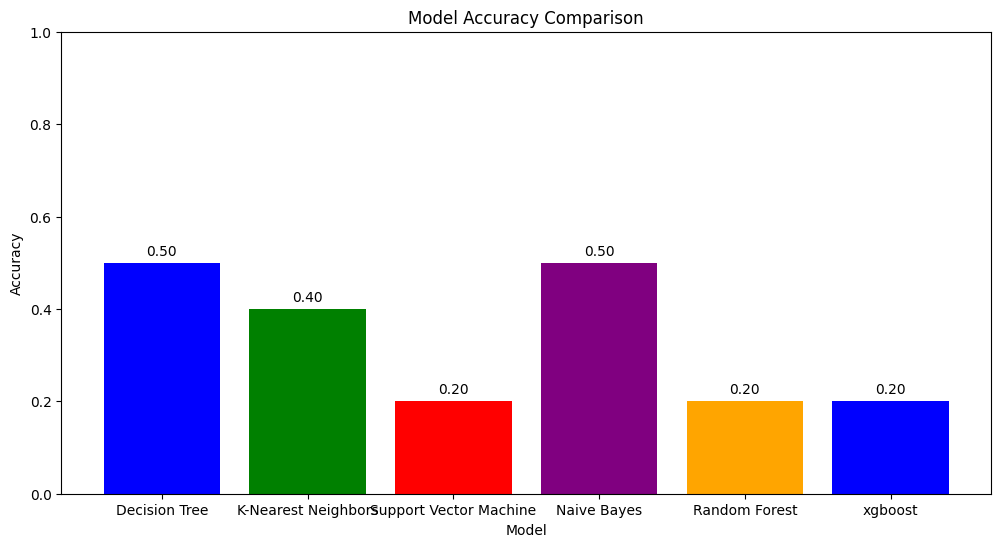

In [382]:
plt.figure(figsize=(12, 6))
plt.bar(accuracy_results.keys(), accuracy_results.values(), color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
for i, v in enumerate(accuracy_results.values()):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')
plt.show()